# Credit Default Prediction using Machine Learning

**Objective:**  
This project aims to predict whether a customer will default on a loan using historical credit and personal data.  
We will perform exploratory data analysis (EDA), clean the data, build models, and evaluate their performance.


In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data understanding


In [2]:

#loading the data set
df=pd.read_csv("credit_risk.csv")
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [3]:
# This sets 'Id' as the index of the DataFrame
df.set_index('Id',inplace =True)

In [4]:
# Display the first five rows of the dataset to get an overview of the structure and sample data
df.head(5)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
Id,,,,,,,,,,,
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [5]:
# Display the last five rows of the dataset to examine how the dataset ends and check for any irregularities
df.tail(5)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
Id,,,,,,,,,,,
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [6]:
# Display the column names in the dataset to understand the available features
df.columns


Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

In [7]:
# Display a random sample of five rows to get a sense of the data distribution and variety
df.sample(5)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
Id,,,,,,,,,,,
14108,24,98000,RENT,4.0,EDUCATION,14000,14.26,1,0.14,N,3
3138,22,36000,MORTGAGE,0.0,EDUCATION,11625,13.49,0,0.32,N,2
14051,25,100000,MORTGAGE,2.0,EDUCATION,15000,15.99,0,0.15,Y,3
31294,37,85000,OWN,3.0,EDUCATION,10000,18.43,0,0.12,Y,16
5811,23,24000,RENT,0.0,PERSONAL,5500,13.99,0,0.23,N,4


In [8]:
# Display the number of rows and columns in the dataset (rows, columns)
df.shape

(32581, 11)

In [9]:
# Generate descriptive statistics for numerical columns to understand data distribution, central tendency, and spread
df.describe()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
# Display summary information about the dataset including column data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32780
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32581 non-null  int64  
 1   Income          32581 non-null  int64  
 2   Home            32581 non-null  object 
 3   Emp_length      31686 non-null  float64
 4   Intent          32581 non-null  object 
 5   Amount          32581 non-null  int64  
 6   Rate            29465 non-null  float64
 7   Status          32581 non-null  int64  
 8   Percent_income  32581 non-null  float64
 9   Default         32581 non-null  object 
 10  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


In [11]:
# Display the data type of each column in the dataset
df.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [12]:
# Check for missing values by showing the total number of nulls in each column
df.isnull().sum()

Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [13]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()

np.int64(165)

In [14]:
# Detect and print the number of outliers in each numerical column using the IQR method
def detect_outliers_all(df):
    for column in df.select_dtypes(include='number').columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower) | (df[column] > upper)]
        print(f"{column}: {len(outliers)} outliers")

In [15]:
# Run the function to detect outliers in all numeric columns of the DataFrame
detect_outliers_all(df)

Age: 1494 outliers
Income: 1484 outliers
Emp_length: 853 outliers
Amount: 1689 outliers
Rate: 6 outliers
Status: 7108 outliers
Percent_income: 651 outliers
Cred_length: 1142 outliers


In [16]:
# Check target variable distribution
print(df['Status'].value_counts())



Status
0    25473
1     7108
Name: count, dtype: int64


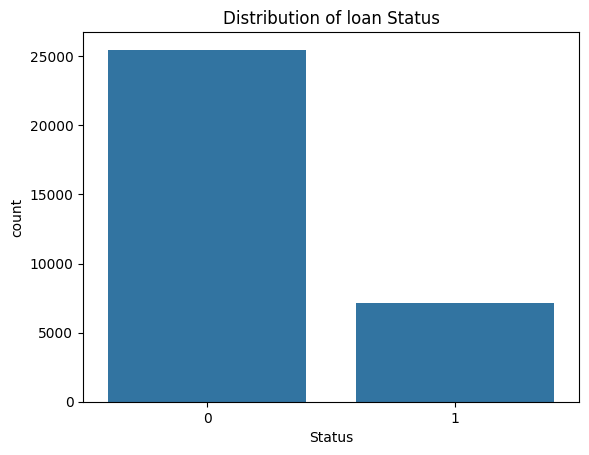

In [17]:
# Visualize the distribution of loan status

sns.countplot(data=df, x='Status')
plt.title("Distribution of loan Status")
plt.show()


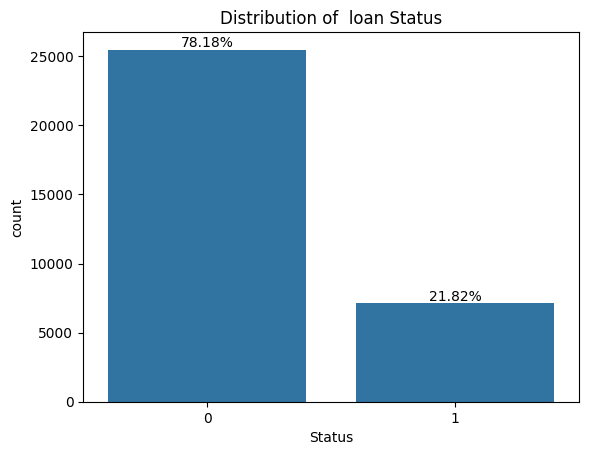

In [18]:

# Visualize the distribution of loan status in percentage
# 0: loan not fully paid,1 loan is fully paid
ax = sns.countplot(data=df, x='Status')
plt.title("Distribution of  loan Status")

# Total number of rows
total = len(df)

# Annotate bars with percentages
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    ax.annotate(f'{percent:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()


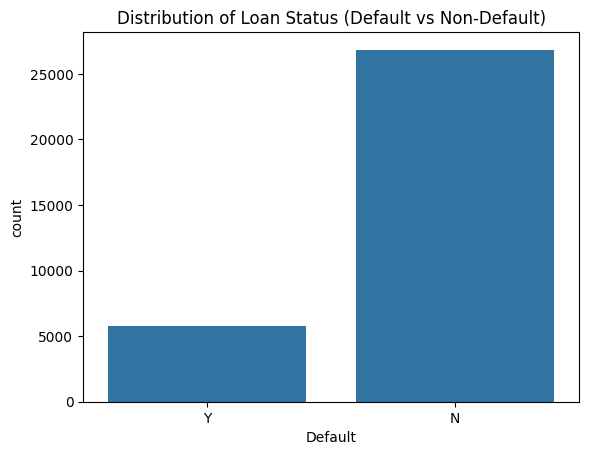

In [19]:
# Plot distribution of target variable 
sns.countplot(data=df, x='Default')
plt.title('Distribution of Loan Status (Default vs Non-Default)')
plt.show()



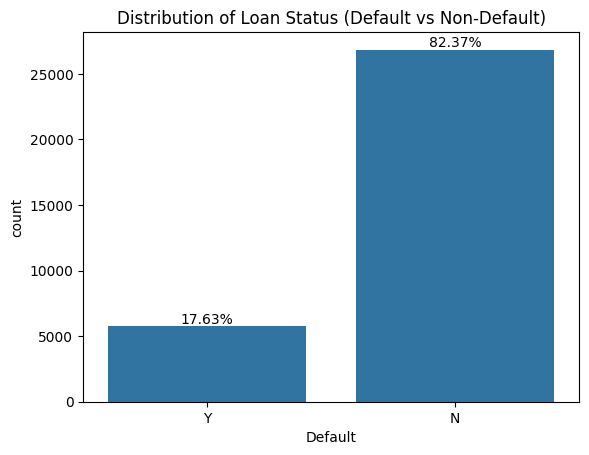

In [20]:
# Plot distribution of target variable  in percentage
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot
ax = sns.countplot(data=df, x='Default')
plt.title('Distribution of Loan Status (Default vs Non-Default)')

# Calculate percentages
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    ax.annotate(f'{percent:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [30]:
# Summary statistics grouped by Default status
df.groupby('Default')[['Income', 'Amount', 'Rate', 'Percent_income']].describe()


Income                                                        \
           count          mean           std     min      25%      50%   
Default                                                                  
0        26686.0  66195.583939  63010.881007  4080.0  39000.0  55200.0   
1         5730.0  65607.552531  57155.026711  4000.0  36000.0  54000.0   

                              Amount                ...    Rate         \
             75%        max    count          mean  ...     75%    max   
Default                                             ...                  
0        80000.0  6000000.0  26686.0   9478.584276  ...  11.860  21.74   
1        78000.0  2039784.0   5730.0  10130.645724  ...  15.325  23.22   

        Percent_income                                                   
                 count      mean       std  min   25%   50%   75%   max  
Default                                                                  
0              26686.0  0.168458  0.106169  0.0  0.09  0.15  0.23  0.83  
1               5730.0  0.178595  0.109382  0.0  0.09  0.16  0.24  0.70  

[2 rows x 32 columns]

## Data Cleaning & Preprocessing

In [ ]:
# Fill missing values in 'Emp_length' and 'Rate' column with the median of those columns
df['Emp_length'].fillna(df['Emp_length'].median(), inplace=True)
df['Rate'].fillna(df['Rate'].median(), inplace=True)


In [ ]:
# Check for any remaining missing values in the DataFrame by summing nulls in each column
df.isnull().sum()


Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [ ]:
# Convert the 'Age' column to integer data type
df['Age'] = df['Age'].astype(int)

# Convert the 'Emp_length' column to integer data type
df['Emp_length'] = df['Emp_length'].astype(int)





In [ ]:
# Convert the 'Home' column to categorical data type
df['Home'] = df['Home'].astype('category')

# Convert the 'Intent' column to categorical data type
df['Intent'] = df['Intent'].astype('category')


In [ ]:
# Map 'Y' to 1 and 'N' to 0 in the 'Default' column and convert the result to integer type
df['Default'] = df['Default'].map({'Y': 1, 'N': 0}).astype(int)


In [ ]:
# Display the data types of all columns in the DataFrame
df.dtypes


Age                  int64
Income               int64
Home              category
Emp_length           int64
Intent            category
Amount               int64
Rate               float64
Status               int64
Percent_income     float64
Default              int64
Cred_length          int64
dtype: object

In [ ]:
# Remove duplicate rows from the DataFrame in place
df.drop_duplicates(inplace=True)


In [ ]:
# Count the number of duplicated rows remaining in the DataFrame
df.duplicated().sum()


np.int64(0)